In [1]:

import multiprocessing as mp

from sandpile import *



# Simulation 

## 2D grid comparisons

In [2]:
params = [
    (20, "open", "conservative"),
    (20, "open", "non conservative"),
    (20, "closed", "conservative"),
    (20, "closed", "non conservative"),
    (5, "open", "conservative"),
    (10, "open", "conservative"),
    # (20, "open", "conservative"),
    (40, "open", "conservative"),
    (5, "closed", "non conservative"),
    (10, "closed", "non conservative"),
    # (20, "closed", "non conservative"),
    (40, "closed", "non conservative"),
    (5, "open", "non conservative"),
    (10, "open", "non conservative"),
    # (20, "open", "non conservative"),
    (40, "open", "non conservative"),
]


def worker(func, args):
    return func(*args)


tasks = []
for grid, b, p in params:
    system = SandpileND(2, grid, 7, b, p)
    x = run_multiple_samples(system, "./data", 100_000, 1, step=25, run=False, desc=f"{grid} {b}, {p}")
    tasks.extend(x)

with mp.Pool(mp.cpu_count() - 2) as pool:
    pool.starmap(worker, tasks)


20 open, conservative 0:   0%|          | 0/99999 [00:00<?, ?it/s]

20 open, non conservative 0:   0%|          | 0/99999 [00:00<?, ?it/s]

20 closed, conservative 0:   0%|          | 0/99999 [00:00<?, ?it/s]

20 closed, non conservative 0:   0%|          | 0/99999 [00:00<?, ?it/s]

10 closed, non conservative 0:   0%|          | 0/99999 [00:00<?, ?it/s]

5 open, conservative 0:   0%|          | 0/99999 [00:00<?, ?it/s]

5 closed, non conservative 0:   0%|          | 0/99999 [00:00<?, ?it/s]

10 open, conservative 0:   0%|          | 0/99999 [00:00<?, ?it/s]

40 closed, non conservative 0:   0%|          | 0/99999 [00:00<?, ?it/s]

40 open, conservative 0:   0%|          | 0/99999 [00:00<?, ?it/s]

5 open, non conservative 0:   0%|          | 0/99999 [00:00<?, ?it/s]

10 open, non conservative 0:   0%|          | 0/99999 [00:00<?, ?it/s]

40 open, non conservative 0:   0%|          | 0/99999 [00:00<?, ?it/s]

# ND closed conservative simulations
    

In [17]:
def worker(func, args):
    return func(*args)


params = [
    # (1, 20),
    # (2, 40),
    # (3, 20),
    # (4, 12),
    (5, 10),
    # (6, 10)
]

tasks = []
for dim, grid in params:
    system = SandpileND(dim, grid, 7, "closed", "non conservative")
    x = run_multiple_samples(system, "./data", 1_000_000, 25, step=50, run=False, desc=f"dim {dim}, grid {grid}",
                             clear=False)
    tasks.extend(x)

with mp.Pool(mp.cpu_count() - 2) as pool:
    pool.starmap(worker, tasks)



dim 5, grid 10 0:   0%|          | 0/999999 [00:00<?, ?it/s]

dim 5, grid 10 1:   0%|          | 0/999999 [00:00<?, ?it/s]

dim 5, grid 10 4:   0%|          | 0/999999 [00:00<?, ?it/s]

dim 5, grid 10 2:   0%|          | 0/999999 [00:00<?, ?it/s]

dim 5, grid 10 6:   0%|          | 0/999999 [00:00<?, ?it/s]

dim 5, grid 10 3:   0%|          | 0/999999 [00:00<?, ?it/s]

dim 5, grid 10 5:   0%|          | 0/999999 [00:00<?, ?it/s]

dim 5, grid 10 8:   0%|          | 0/999999 [00:00<?, ?it/s]

dim 5, grid 10 9:   0%|          | 0/999999 [00:00<?, ?it/s]

dim 5, grid 10 7:   0%|          | 0/999999 [00:00<?, ?it/s]

dim 5, grid 10 10:   0%|          | 0/999999 [00:00<?, ?it/s]

dim 5, grid 10 11:   0%|          | 0/999999 [00:00<?, ?it/s]

dim 5, grid 10 12:   0%|          | 0/999999 [00:00<?, ?it/s]

dim 5, grid 10 13:   0%|          | 0/999999 [00:00<?, ?it/s]

dim 5, grid 10 14:   0%|          | 0/999999 [00:00<?, ?it/s]

dim 5, grid 10 15:   0%|          | 0/999999 [00:00<?, ?it/s]

dim 5, grid 10 16:   0%|          | 0/999999 [00:00<?, ?it/s]

dim 5, grid 10 17:   0%|          | 0/999999 [00:00<?, ?it/s]

dim 5, grid 10 18:   0%|          | 0/999999 [00:00<?, ?it/s]

dim 5, grid 10 19:   0%|          | 0/999999 [00:00<?, ?it/s]

dim 5, grid 10 20:   0%|          | 0/999999 [00:00<?, ?it/s]

dim 5, grid 10 21:   0%|          | 0/999999 [00:00<?, ?it/s]

dim 5, grid 10 22:   0%|          | 0/999999 [00:00<?, ?it/s]

dim 5, grid 10 23:   0%|          | 0/999999 [00:00<?, ?it/s]

dim 5, grid 10 24:   0%|          | 0/999999 [00:00<?, ?it/s]

# Visualisation

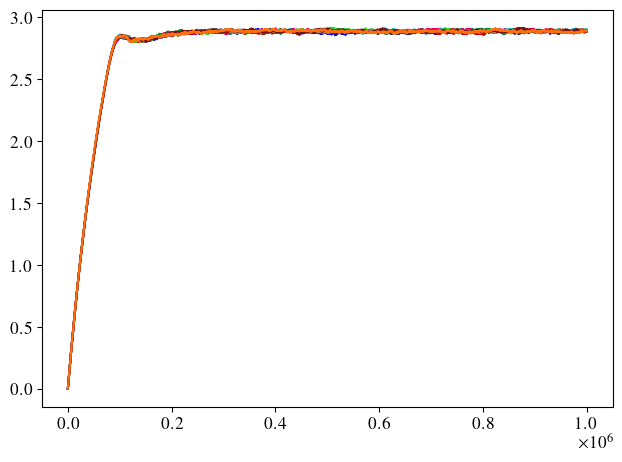

In [20]:

from analysis import *


dim, grid = 5, 10

plt.figure("visualisation")
for i in range(10):
    data_dir = pathlib.Path(f"./data/d{dim}_g{grid}_c7_cl_nco/data_{i}.slopes.npy").resolve().absolute()

    step, slope = load_slope_values(data_dir.__str__())
    draw_slope(slope, step)

